In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# converstion of originalImage.jpg to cropped, resized and bayesed image

(375, 500, 3)


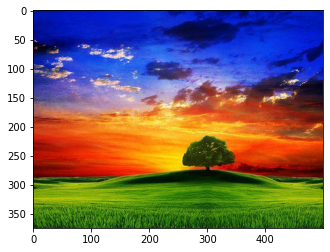

In [3]:
oriImg = plt.imread('originalImage.jpg')
print(oriImg.shape)
plt.imshow(oriImg)
plt.show()

(375, 375, 3)


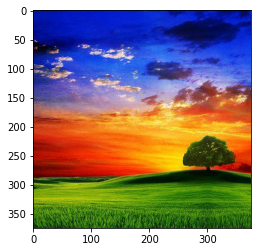

In [4]:
croppedImg = oriImg[0:oriImg.shape[0], 0:oriImg.shape[0], :]
print(croppedImg.shape)
plt.imshow(croppedImg)
plt.show()

(375, 500, 3)


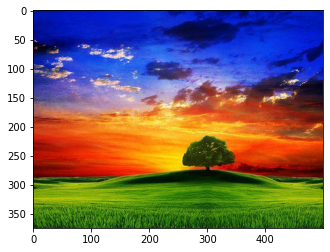

In [5]:
resizedImg = cv2.resize(croppedImg, (100, 100))
resizedImg = oriImg
print(resizedImg.shape)
plt.imshow(resizedImg)
plt.show()

plt.imsave('CroppedResizedImage.png', resizedImg)

(375, 500)


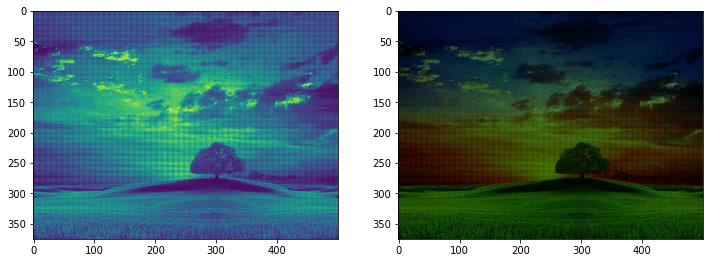

In [9]:
bayerImg = np.zeros((resizedImg.shape[0], resizedImg.shape[1]), dtype=np.uint8)
bayerImg2 = np.zeros((resizedImg.shape[0], resizedImg.shape[1], 3), dtype=np.uint8)

# Blue values - odd rows and odd columns
bayerImg[::2, ::2] = resizedImg[::2, ::2, 2]
bayerImg2[::2, ::2, 2] = resizedImg[::2, ::2, 2]

# Red values - even rows and even columns
bayerImg[1::2, 1::2] = resizedImg[1::2, 1::2, 0]
bayerImg2[1::2, 1::2, 0] = resizedImg[1::2, 1::2, 0]

# Green values - BGBGBG....
bayerImg[1::2, ::2] = resizedImg[1::2, ::2, 1]
bayerImg2[1::2, ::2, 1] = resizedImg[1::2, ::2, 1]

# Green values - GRGRGR....
bayerImg[::2, 1::2] = resizedImg[::2, 1::2, 1]
bayerImg2[::2, 1::2, 1] = resizedImg[::2, 1::2, 1]

fig, axs = plt.subplots(1, 2, figsize=(12,6))

print(bayerImg.shape)
axs[0].imshow(bayerImg)
axs[1].imshow(bayerImg2)
plt.show()
plt.imsave('DocResources/BayerImage_SingleChannel.png', bayerImg)
plt.imsave('DocResources/BayerImage_3Channel.png', bayerImg2)

In [13]:
np.save('BayerImage.npy', bayerImg)

In [14]:
dd = np.load('BayerImage.npy')

In [15]:
st = ''
for i in range(bayerImg.shape[0]):
    for j in range(bayerImg.shape[1]):
        st = st + hex(dd[i, j])[2:] + '\n'

with open('BayerImage.mem', 'w+') as f:
    f.write(st)
    f.close()